keras 데이터셋의 CIFAR-10을 활용하였습니다.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import warnings

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from keras.optimizers import Adam
from keras.models import load_model
from keras.utils import to_categorical

warnings.filterwarnings(action='ignore')

In [2]:
cifar = keras.datasets.cifar10 

(X_train, y_train), (X_test, y_test) = cifar.load_data()
'''
X_train = train_images
y_train = train_labels
X_test = test_images
y_test = test_labels
'''

'\nX_train = train_images\ny_train = train_labels\nX_test = test_images\ny_test = test_labels\n'

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_test.shape

(10000, 1)

[6], [9], [9], [4], [1], 

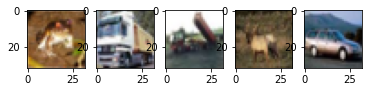

In [7]:
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i])
    print(y_train[i], end=", ")

plt.show()

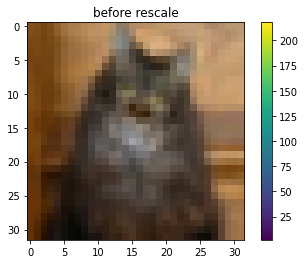

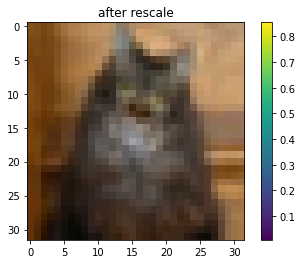

In [8]:
plt.figure()
plt.title('before rescale')
plt.imshow(X_train[26])
plt.colorbar()

X_train = X_train/255.0
X_test = X_test/255.0


plt.figure()
plt.title('after rescale')
plt.imshow(X_train[26])
plt.colorbar()

In [9]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same')) 
model.add(Conv2D(64, (3, 3), activation='relu', padding='same')) 
model.add(MaxPool2D(pool_size=(2, 2))) 
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(512, activation='relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [11]:
model.compile(loss='sparse_categorical_crossentropy', optimizer= 'adam', metrics=['acc'])

In [12]:
history = model.fit(X_train, y_train, batch_size=128, epochs=15, validation_split=0.1)

Epoch 1/15
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
352/352 [==============================] - ETA: 0s - loss: 1.6450 - acc: 0.3968WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x00000248DC284E58> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and

In [13]:
model.save('CNN_CIFAR10.h5')
model = load_model('CNN_CIFAR10.h5')

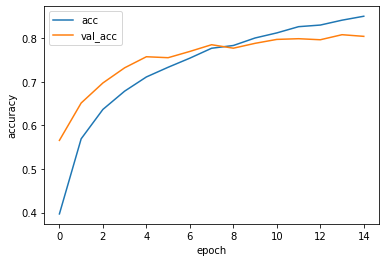

In [14]:
plt.plot(history.history['acc'], label='acc') 
plt.plot(history.history['val_acc'], label='val_acc') 
plt.ylabel('accuracy') 
plt.xlabel('epoch') 
plt.legend(loc='best') 
plt.show()

In [15]:
test_loss, test_acc = model.evaluate(X_test, y_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 [==============================] - 1s 2ms/step - loss: 0.6727 - acc: 0.1016


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
['cat'], ['ship'], ['ship'], ['airplane'], [

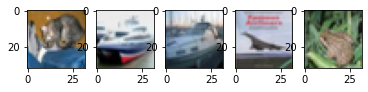

In [16]:
test_predictions = model.predict_classes(X_test[:5]) 
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'] 

for i in range(5): 
    plt.subplot(2, 5, i + 1) 
    plt.imshow(X_test[i]) 
    print([labels[test_predictions[i]]], end=", ") 
    
plt.show()

**참고자료**

- [Image Classification using Tensorflow2.0 on CIFAR-10 dataset]('https://medium.com/analytics-vidhya/image-classification-using-tensorflow2-0-with-cifar-10-dataset-cc595ceb0082')
- [Image Classification with CNN (Feat. CIFAR-10 and Keras)]('https://hdevstudy.tistory.com/116')